In [4]:
# import library
import numpy as np
from scipy import stats
from scipy.stats import poisson
import matplotlib.pyplot as plt
import pickle
import pandas as pd
# open the file of interest, and use pickle loading
higgsdata = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs_dict = pickle.load(higgsdata)
qcddata = open("qcd_100000_pt_250_500.pkl",'rb')
qcd_dict = pickle.load(qcddata)
hi_lumi = pd.read_hdf('data_highLumi_pt_250_500.h5')
low_lumi = pd.read_hdf('data_lowLumi_pt_250_500.h5')
higgs_mass = higgs_dict['mass']
qcd_mass = qcd_dict['mass']


# LAB 7

In [5]:
for i in range(10):
 print(higgs_mass[i],higgs_dict['t21'][i], qcd_mass[i],qcd_dict['t21'][i],)


125.15036485403486 0.3834739011002356 125.29872026896659 0.6933697749399292
130.55267214662751 0.3132398111260766 88.0470543065784 0.6073084452604588
125.70306309880351 0.43991668308005877 85.79417445424248 0.8324948619768904
126.21585336608149 0.29946509799138826 42.94732814665354 0.6511974290251
132.18250371689544 0.2308861578905958 59.54222652643443 0.4983617059694298
125.67653506886116 0.087227813063026 52.25202892050295 0.9681512619071891
127.65400794990293 0.37667719673415134 87.72005721179889 0.7099643238882115
124.16656852260293 0.2465458958578114 59.648628855244354 0.7757240797377786
122.13035265114684 0.5277391127700974 74.23631116158323 0.7452078488921513
125.19144633816678 0.10415336256315426 41.90450338556174 0.8743525511272748


Make a stacked histogram plot for the feature variable: mass


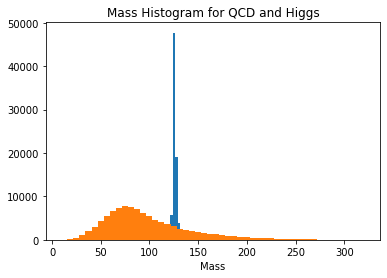

In [6]:
plt.xlabel("Mass")
plt.title("Mass Histogram for QCD and Higgs")
plt.hist(higgs_dict['mass'], 50)
plt.hist(qcd_dict['mass'], 50)
plt.show()

The stacked histogram shows that the Higgs boson shows the distribution of QCD and Higgs. On the distribution, we found that Higgs have a mass of about 115 GeV with a narrow standard deviation compared to the QCD background. Higgs boson is more massive than most of the particles in the background. So we can use mass to distinguish higgs and qcd

# part 1

In [7]:
n_higgs = 100
n_qcd = 20000
n_tot = n_higgs + n_qcd
test = n_higgs/np.sqrt(n_qcd)
sig = stats.norm.ppf(stats.poisson.sf(n_qcd, n_tot))
print(sig)
print(test)

0.7012225600355231
0.7071067811865475


The significance is approximately equal to  $\frac{N_{Higgs}}{\sqrt(N_{QCD})}$

# part 2

In [13]:
mass_cut = cut(higgs_dict, qcd_dict, 'mass', 110, 140, 20)
print(f"The mass cut {mass_cut[0]} gives a significance of {mass_cut[1]:.2f}")

The mass cut [124.77070707 126.88080808] gives a significance of 3.25


Compared to the initial significance of about 0.71, the significance 3.25 of the cut is much higher.

In [14]:
higgs_mass_cut = higgs_dict[(higgs_mass>=mass_cut[0][0]) & (higgs_mass<=mass_cut[0][1])]
qcd_mass_cut = qcd_dict[(qcd_mass>=mass_cut[0][0]) & (qcd_mass<=mass_cut[0][1])]
higgs_t21 = higgs_mass_cut['t21']
qcd_t21 = qcd_mass_cut['t21']

higgs_t21_cut = higgs_mass_cut[(higgs_t21>=t21_cut[0][0]) & (higgs_t21<=t21_cut[0][1])]
qcd_t21_cut = qcd_mass_cut[(qcd_t21>=t21_cut[0][0]) & (qcd_t21<=t21_cut[0][1])]




NameError: name 't21_cut' is not defined

# part 3 

Feature plots without the mass cuts

In [ ]:
fig, ax = plt.subplots(higgs_dict.shape[1], 1, figsize=(10, 50))
for i, feature in enumerate(higgs_dict):
    ax[i].hist(qcd_dict[feature], 50, density=True, label="QCD")
    ax[i].hist(higgs_dict[feature], 50, density=True, label="Higgs", alpha=0.7)
    ax[i].title.set_text(f"Stacked {feature} Histogram for QCD and Higgs")
    ax[i].legend()

Feature plots with mass cuts

In [ ]:
fig, ax = plt.subplots(higgs_dict.shape[1], 1, figsize=(10, 50))
for i, feature in enumerate(higgs_dict):
    ax[i].hist(qcd_mass_cut[feature], 50, density=True, label="QCD")
    ax[i].hist(higgs_mass_cut[feature], 50, density=True, label="Higgs", alpha=0.7)
    ax[i].title.set_text(f"{feature} Histogram for QCD and Higgs")
    ax[i].legend()

# part 4 

Optimize event selections using multiple features 
Applying t21 feature cuts

In [ ]:
t21_cut = cut(higgs_mass_cut, qcd_mass_cut, 't21', 0, 5, 5, mass_cut[2], mass_cut[3])
print(f"The t21 cut {t21_cut[0]} gives a significance of {t21_cut[1]:.2f}")


In [ ]:
fig, ax = plt.subplots(higgs_dict.shape[1], 1, figsize=(10, 50))
for i, feature in enumerate(higgs_dict):
    ax[i].hist(qcd_t21_cut[feature], 30, density=True, label="QCD")
    ax[i].hist(higgs_t21_cut[feature], 30, density=True, label="Higgs", alpha=0.7)
    ax[i].title.set_text(f"Stacked {feature} Histogram for QCD and Higgs")
    ax[i].legend()

In [ ]:
n_higgs_t21 = np.round(t21_cut[2])   
n_qcd_t21 = np.round(t21_cut[3])    
n_tot_t21 = n_higgs_t21 + n_qcd_t21
sig = stats.norm.ppf(stats.poisson.sf(n_qcd_t21, n_tot_t21))
print(f'Calculating with Poisson statistics yeilds a significance of {sig:.2f}')

# lab 8

High luminosity data

In [ ]:
h_mc = hi_lumi[(hi_lumi['mass']>=mass_cut[0][0]) & (hi_lumi['mass']<=mass_cut[0][1])]
h_t21c = h_mc[(h_mc['t21']>=t21_cut[0][0]) & (h_mc['t21']<=t21_cut[0][1])]
for i in range(10):
 print(hi_lumi['mass'][i],hi_lumi['t21'][i])



In [ ]:
plt.title("Mass Histogram Without Event Selection")
plt.hist(hi_lumi['mass'], 50, density=True, alpha=1, label="High Luminosity Data")
plt.hist(higgs_mass, 50, density=True, alpha=0.5, label="Signal")
plt.hist(qcd_mass, 50, density=True, alpha=0.5, label="Background")
plt.legend()
plt.show()

In [ ]:
plt.title("Mass Histogram With Mass Cuts")
plt.hist(h_mc['mass'], density=True, label="High Luminosity Data")
plt.hist(higgs_mass_cut['mass'], density=True, alpha=0.5, label="Signal")
plt.hist(qcd_mass_cut['mass'], density=True, alpha=0.5, label="QCD")
plt.legend()
plt.plot()

In [ ]:
plt.title("t21 Histogram Without Event Selection")
plt.hist(hi_lumi['t21'], 50, density=True, label="High Luminosity Data")
plt.hist(higgs_dict['t21'], 50, density=True, alpha=0.5, label="Signal")
plt.hist(qcd_dict['t21'], 50, density=True, alpha=0.5, label="Background")
plt.legend()
plt.show()

In [ ]:
plt.title("t21 Histogram With Mass and t2 Cuts")
plt.hist(h_t21c['t21'],density=True, label="High Luminosity Data")
plt.hist(higgs_t21_cut['t21'],density=True, alpha=0.5, label="Signal")
plt.hist(qcd_t21_cut['t21'], density=True, alpha=0.3, label="QCD")
plt.legend()
plt.plot()

40 Higgs Bosons were expected and 50 were determined to be in the high luminosity dataset with a 5.18 sigma significance.


Low Luminosity Data

In [ ]:
l_mc = low_lumi[(low_lumi['mass']>=mass_cut[0][0]) & (low_lumi['mass']<=mass_cut[0][1])]
l_t21c = l_mc[(l_mc['t21']>=t21_cut[0][0]) & (l_mc['t21']<=t21_cut[0][1])]
for i in range(10):
 print(low_lumi['mass'][i],low_lumi['t21'][i])

In [ ]:
plt.title("Mass Histogram Without Event Selection")
plt.hist(low_lumi['mass'], 50, density=True, label="Low Luminosity Data")
plt.hist(higgs_mass, 50, density=True, alpha=0.5, label="Signal")
plt.hist(qcd_mass, 50, density=True, alpha=0.5, label="Background")
plt.legend()
plt.show()


In [ ]:
plt.title("Mass Histogram With Mass Cuts")
plt.hist(l_mc['mass'], density=True, label="Low Luminosity Data")
plt.hist(higgs_mass_cut['mass'], density=True, alpha=0.5, label="Signal")
plt.hist(qcd_mass_cut['mass'], density=True, alpha=0.5, label="QCD")
plt.legend()
plt.plot()

In [ ]:
plt.title("t21 Histogram Without Event Selection")
plt.hist(low_lumi['t21'], 50, density=True, label="Low Luminosity Data")
plt.hist(higgs_dict['t21'], 50, density=True, alpha=0.5, label="Signal")
plt.hist(qcd_dict['t21'], 50, density=True, alpha=0.5, label="Background")
plt.legend()
plt.show()

In [ ]:
plt.title("t21 Histogram With Mass and t21 Cuts")
plt.hist(l_t21c['t21'], density=True, label="Low Luminosity Data")
plt.hist(higgs_t21_cut['t21'], density=True, alpha=0.5, label="Signal")
plt.hist(qcd_t21_cut['t21'], density=True, alpha=0.5, label="QCD")
plt.legend()
plt.plot()

In [ ]:
len(l_d2c)

4 Higgs bosons were expected and 3 were determined to be in the high luminosity dataset with a 5.18 sigma significance.

Evaluating Confidence Level for Low Luminosity Data

In [15]:
expected = stats.norm.ppf(stats.norm.cdf(2),loc=4)
print(expected)

6.0


In [16]:
observed = stats.norm.ppf(stats.norm.cdf(2),loc=3)
print(observed)

5.0


The expected 95% confidence level upper limit is 5 counts of Higgs bosons.
The observed number of Higgs bosons falls within the expected 95% confidence limit for the low luminosity dataset. This means that the feature cuts effectively removed noise and returned a number of Higgs bosons that was expected.

# supported function

In [12]:
def cut(higgs, qcd, feature, lower, upper, max_size, n_h=n_higgs, n_q=n_qcd):
    cut_max = 0
    cut_size = 1
    sig_max = sig  
    n_higgs_var = n_higgs    
    n_qcd_var = n_qcd       
    hf = higgs[feature]
    qf = qcd[feature]
    size_arr = np.linspace(.1, max_size, 100)

    for size in size_arr:
        cuts = np.arange(lower, upper, size)
        for i, cut in enumerate(cuts):
            higgs_cut = np.array(hf[hf>cut][hf < cut + size])
            qcd_cut = np.array(qf[qf>cut][qf < cut + size])
            rat_h = len(higgs_cut)/len(higgs)
            rat_q = len(qcd_cut)/len(qcd)
            adj_n_h = n_h * rat_h
            adj_n_q = n_q * rat_q
            adj_n_q = 1 if adj_n_q == 0 else adj_n_q
            adj_sig = adj_n_h/np.sqrt(adj_n_q)
            if (adj_sig > sig_max):
                cut_max = cut
                cut_size = size
                sig_max = adj_sig
                n_higgs_var = adj_n_h
                n_qcd_var = adj_n_q
    mass_cuts = np.array((cut_max, cut_max + cut_size))
    return mass_cuts, sig_max, n_higgs_var, n_qcd_var